In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

オープンソースであるsoxを用いて，raw形式の音声データをwav形式に変換する．  
(注) C言語のshort型は2byte(16bit)符号付

- 形式の指定  
-e signed-integer(符号付)
-e unsigned-integer(符号なし)  

- サンプルビットの指定(16bit)  
-b 16

- サンプリングレートの指定(16000Hz)  
-r 16000

- チャンネルの指定  
-c 1: モノラル  
-c 2: ステレオ  

- エンディアンの入れ替え(little, bigの指定ではない)  
-X
 
`sox -r 16000 -b 16 -e signed-integer music.raw music.wav`

In [16]:
import wave
import librosa
import librosa.display
import IPython
import struct
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 課題1 与えられた音源の逆再生

In [13]:
# バイナリ形式で開く
with open('./P_file/music.raw', 'rb') as raw:
    # h:C言語でのshort型，<:リトルエンディアンで読み込む
    raw_data = np.fromfile(raw, dtype='<h', sep='')
print(raw_data[100000:100010])  # 読み込めているかチェック

[  49   58   15 -110 -254 -373 -345 -194  -86  -54]


In [18]:
binwave = struct.pack('h' * len(raw_data), *raw_data)  # バイナリ化

with wave.Wave_write('./P_file/music.wav') as wav:
    # チャンネル数(1:モノラル,2:ステレオ)，サンプルサイズ(バイト)，サンプリング周波数，フレーム数
    params = (1, 2, 16000, len(binwave), 'NONE', 'not compressed')
    wav.setparams(params)
    wav.writeframes(binwave)

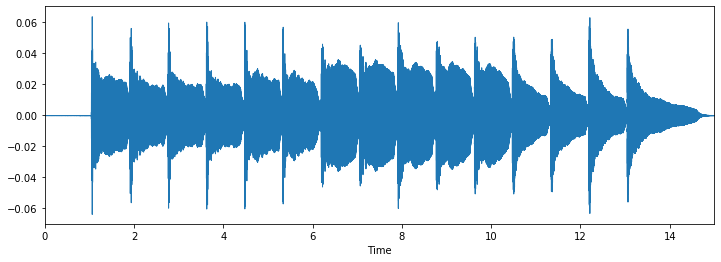

In [19]:
# 元音源
x, sr = librosa.load('./P_File/music.wav')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr)
plt.show()
IPython.display.Audio(data=x, rate=sr)

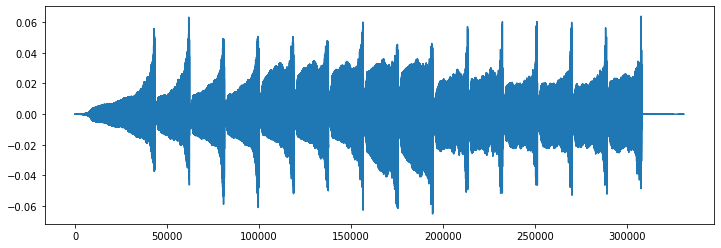

In [22]:
# 逆再生音源
x_inv = x[::-1]
plt.figure(figsize=(12, 4))
plt.plot(x_inv)
plt.show()
IPython.display.Audio(data=x_inv, rate=sr)
librosa.output.write_wav('./P_file/music_inv.wav', x_inv, sr)  # 保存
IPython.display.Audio(data=x_inv, rate=sr)